# 

# Plotting Argo data
Plotting Argo data for the entire study region, alterations from original code need to be done to be able to plot such a large data set

In [52]:
# Required Libraries
# If you don't have these libraries installed, you can install them using pip:

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import polars as pl
import gsw  


# The Argopy library used for accessing and working with Argo data
from argopy.plot import scatter_map, scatter_plot  # This is a function to easily make maps and scatter plots
from argopy import ArgoColors
from argopy import ArgoIndex
from argopy import ArgoNVSReferenceTables

In [37]:
# Importing data set 

df = pd.read_parquet('../data/argo/argo_pq/icb_floats_table.parquet')

print(df.head())
print("-----------------------------------------//---------------------------------------------------")
print(df.info())
print("-----------------------------------------//---------------------------------------------------")
print(df.columns)

   CONFIG_MISSION_NUMBER  CYCLE_NUMBER DATA_MODE DIRECTION  PLATFORM_NUMBER  \
0                      2            55         D         A          6900492   
1                      2            55         D         A          6900492   
2                      2            55         D         A          6900492   
3                      2            55         D         A          6900492   
4                      2            55         D         A          6900492   

   POSITION_QC  PRES  PRES_ADJUSTED  PRES_ADJUSTED_ERROR  PRES_ADJUSTED_QC  \
0            1  16.0           16.0                  2.4                 1   
1            1  25.0           25.0                  2.4                 1   
2            1  36.0           36.0                  2.4                 1   
3            1  46.0           46.0                  2.4                 1   
4            1  56.0           56.0                  2.4                 1   

   ...   TEMP  TEMP_ADJUSTED  TEMP_ADJUSTED_ERROR  TEMP_

In [38]:
# Loading data set
df = pd.read_parquet('../data/argo/argo_pq/icb_floats_table.parquet')

## Loading information about the region

In [39]:
# Defining the region and time period of interest
BOX = [-35, -30, 62, 64, 0, 2000, '2010-01', '2024-12']

In [40]:
# Load the BGC-synthetic profiles index
# rq: we work with synthetic profiles because that's the only dataset available from the erddap at this point (2023/07/21)
idx = ArgoIndex(index_file='bgc-s').load()  
idx

<argoindex.pyarrow>
Host: https://data-argo.ifremer.fr
Index: argo_synthetic-profile_index.txt.gz
Convention: argo_synthetic-profile_index (Synthetic-Profile directory file of the Argo GDAC)
In memory: True (364947 records)
Searched: False

In [41]:
# Select profile in a space/time domain:
index_BOX = [BOX[ii] for ii in [0, 1, 2, 3, 6, 7]]  # We don't want the pressure axis BOX limits
idx = idx.query.box(index_BOX) # Had to replace this with something new as argopy has been updated

In [42]:
idx.read_params()

['BBP700',
 'CDOM',
 'CHLA',
 'CHLA_FLUORESCENCE',
 'CP660',
 'DOWNWELLING_PAR',
 'DOWN_IRRADIANCE380',
 'DOWN_IRRADIANCE412',
 'DOWN_IRRADIANCE490',
 'DOXY',
 'NITRATE',
 'PH_IN_SITU_TOTAL',
 'PRES',
 'PSAL',
 'TEMP']

In [43]:
# Extract the list of BGC parameters:
bgc_params = idx.read_params()
#[bgc_params.remove(p) for p in ['PH_IN_SITU_TOTAL', 'BISULFIDE']]  # Remove core variables from the list
bgc_params

['BBP700',
 'CDOM',
 'CHLA',
 'CHLA_FLUORESCENCE',
 'CP660',
 'DOWNWELLING_PAR',
 'DOWN_IRRADIANCE380',
 'DOWN_IRRADIANCE412',
 'DOWN_IRRADIANCE490',
 'DOXY',
 'NITRATE',
 'PH_IN_SITU_TOTAL',
 'PRES',
 'PSAL',
 'TEMP']

## BGC Parameter Map


We can also make a scatter map with one BGC parameter data mode.

In [44]:
# Randomly select one BGC parameter to work with:
a_param = bgc_params[np.random.randint(len(bgc_params))]
a_param

'CHLA'

In [45]:
# Get more verbose information about this parameter (usefull for plot titles):
reftbl = ArgoNVSReferenceTables().tbl('R03')
param_info = reftbl[reftbl['altLabel']==a_param].iloc[0].to_dict()
param_info

{'altLabel': 'CHLA',
 'prefLabel': 'Chlorophyll-A',
 'definition': 'Chlorophyll-a concentration (mg/m^3), reported by ECO3 sensor. Local_Attributes:{long_name:Chlorophyll-A; standard_name:mass_concentration_of_chlorophyll_a_in_sea_water; units:mg/m3; valid_min:-; valid_max:-; category:b; fill_value:99999.f; data_type:float}.',
 'deprecated': 'false',
 'id': 'http://vocab.nerc.ac.uk/collection/R03/current/CHLA/'}

In [46]:
df

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_ADJUSTED,PRES_ADJUSTED_ERROR,PRES_ADJUSTED_QC,...,TEMP,TEMP_ADJUSTED,TEMP_ADJUSTED_ERROR,TEMP_ADJUSTED_QC,TEMP_QC,TIME_QC,VERTICAL_SAMPLING_SCHEME,LATITUDE,LONGITUDE,TIME
0,2,55,D,A,6900492,1,16.000000,16.0,2.4,1,...,5.8450,5.845,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",63.242000,-32.411000,2010-01-04 04:33:00
1,2,55,D,A,6900492,1,25.000000,25.0,2.4,1,...,5.8460,5.846,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",63.242000,-32.411000,2010-01-04 04:33:00
2,2,55,D,A,6900492,1,36.000000,36.0,2.4,1,...,5.8510,5.851,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",63.242000,-32.411000,2010-01-04 04:33:00
3,2,55,D,A,6900492,1,46.000000,46.0,2.4,1,...,5.8330,5.833,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",63.242000,-32.411000,2010-01-04 04:33:00
4,2,55,D,A,6900492,1,56.000000,56.0,2.4,1,...,5.8280,5.828,0.002,1,1,1,"Primary sampling: averaged [10 sec sampling, 2...",63.242000,-32.411000,2010-01-04 04:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500263,14,95,R,A,6904240,1,1775.260010,NaN,NaN,0,...,3.5120,NaN,NaN,0,1,1,"Primary sampling: averaged [2s samp., 50dbar a...",62.582617,-31.331703,2024-11-30 14:09:51
500264,14,95,R,A,6904240,1,1824.660034,NaN,NaN,0,...,3.4951,NaN,NaN,0,1,1,"Primary sampling: averaged [2s samp., 50dbar a...",62.582617,-31.331703,2024-11-30 14:09:51
500265,14,95,R,A,6904240,1,1874.989990,NaN,NaN,0,...,3.4778,NaN,NaN,0,1,1,"Primary sampling: averaged [2s samp., 50dbar a...",62.582617,-31.331703,2024-11-30 14:09:51
500266,14,95,R,A,6904240,1,1925.770020,NaN,NaN,0,...,3.4523,NaN,NaN,0,1,1,"Primary sampling: averaged [2s samp., 50dbar a...",62.582617,-31.331703,2024-11-30 14:09:51


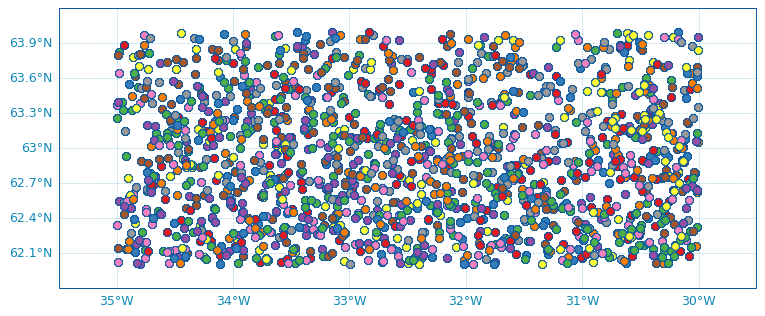

In [47]:
# But here, we use the index retrieved with the DataFetcher:
scatter_map(df, traj=False, set_global=False, legend=False);

## Physical Variables

Temperature and Salinity 



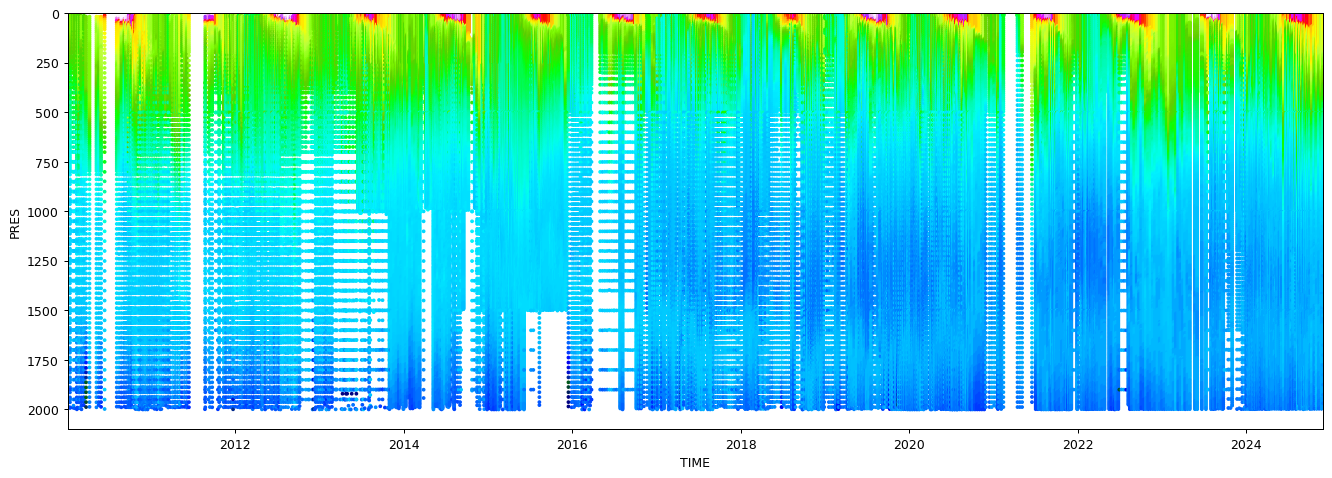

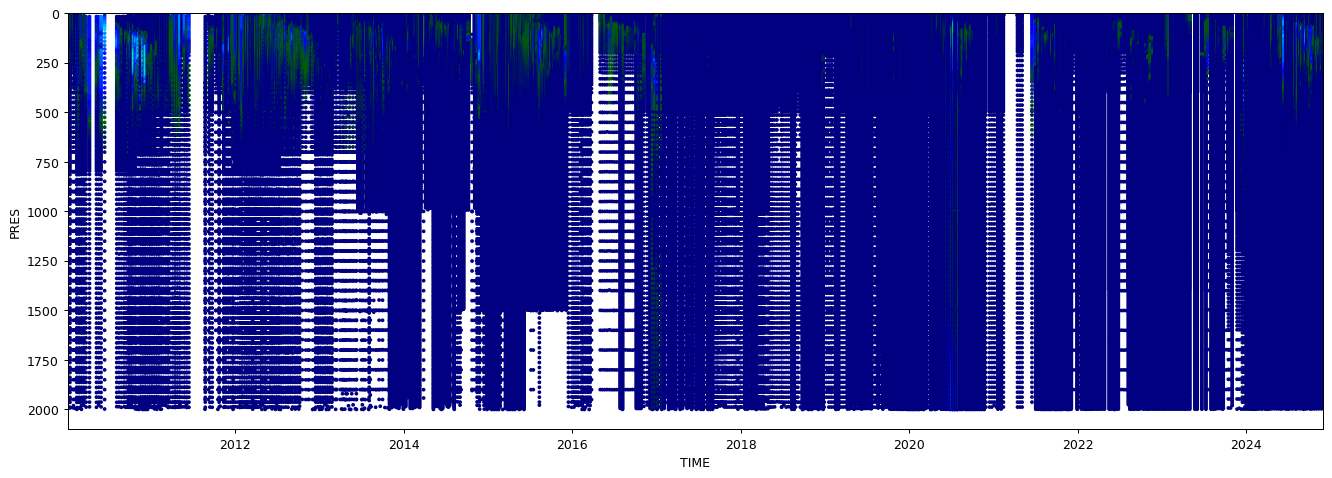

In [48]:
# Crearing graphs for Temperature and Salinity
fig, axes, artis = scatter_plot(df, 'TEMP', vmin=2, vmax=12);
fig, axes, artis = scatter_plot(df, 'PSAL', vmin=35, vmax=36);

In [ ]:
# Here we start using Polars to asses physical parameters

# Adapting the Pandas DataFrame to Polars DataFrame
df = pl.from_pandas(df)

# Filtering data by the surface (PRES < 300 dbar)
df_surface = df.filter(pl.col('PRES') < 300)



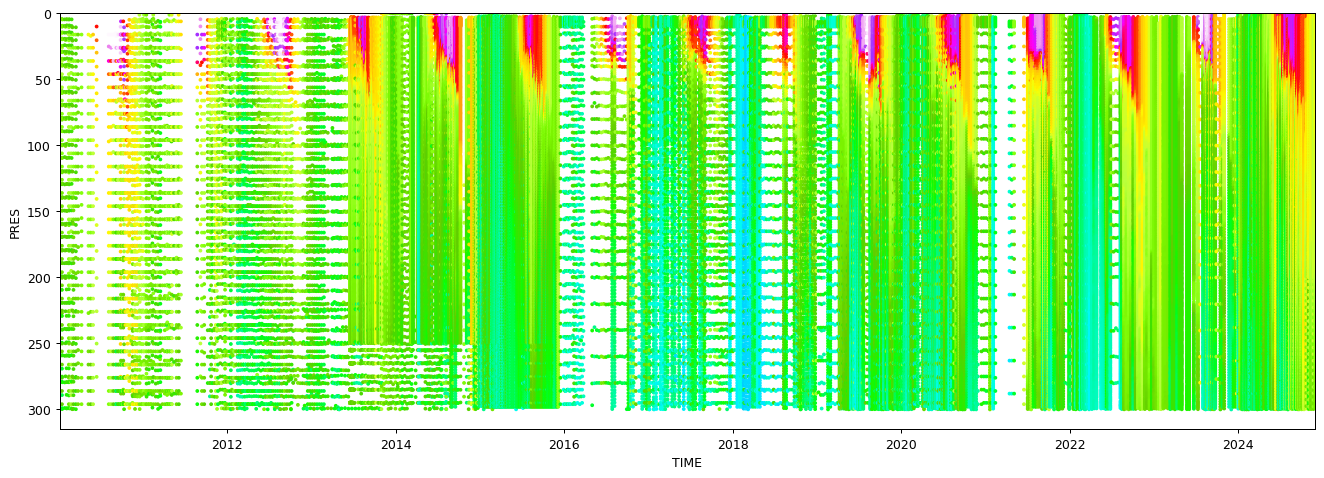

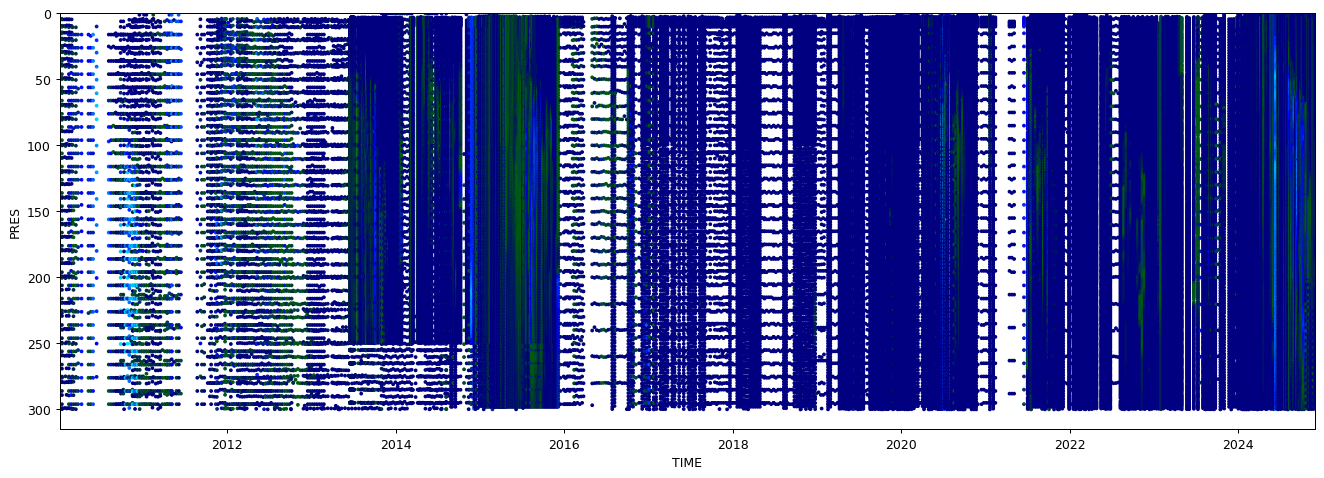

In [51]:
# Crearing graphs for Temperature and Salinity

pandas_df = df_surface.to_pandas()
fig, axes, artis = scatter_plot(pandas_df, 'TEMP', vmin=2, vmax=12);
fig, axes, artis = scatter_plot(pandas_df, 'PSAL', vmin=35, vmax=36);

In [57]:
# Using gsw to calculate potential density in situ denisity

# This uses earge mode (simpler for now), rather than polars lazy mode

def add_density(df: pl.DataFrame) -> pl.DataFrame:
    SP  = df["PSAL"].to_numpy()       
    t   = df["TEMP"].to_numpy()       
    p   = df["PRES"].to_numpy()       
    lon = df["LONGITUDE"].to_numpy()  
    lat = df["LATITUDE"].to_numpy()   

    SA = gsw.SA_from_SP(SP, p, lon, lat)
    CT = gsw.CT_from_t(SA, t, p)
    rho = gsw.rho(SA, CT, p)

    return df.with_columns(pl.Series("RHO", rho))

df_with_rho = add_density(df)

df_with_rho.head()

/Users/davidlewis/Desktop/Masters/venv/lib/python3.12/site-packages/gsw/_wrapped_ufuncs.py:1143: RuntimeWarning: invalid value encountered in ct_from_t
  return _gsw_ufuncs.ct_from_t(SA, t, p)


CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_ADJUSTED,PRES_ADJUSTED_ERROR,PRES_ADJUSTED_QC,PRES_QC,PSAL,PSAL_ADJUSTED,PSAL_ADJUSTED_ERROR,PSAL_ADJUSTED_QC,PSAL_QC,TEMP,TEMP_ADJUSTED,TEMP_ADJUSTED_ERROR,TEMP_ADJUSTED_QC,TEMP_QC,TIME_QC,VERTICAL_SAMPLING_SCHEME,LATITUDE,LONGITUDE,TIME,RHO
i64,i64,str,str,i64,i64,f32,f32,f32,i64,i64,f32,f32,f32,i64,i64,f32,f32,f32,i64,i64,i64,str,f64,f64,datetime[ns],f64
2,55,"""D""","""A""",6900492,1,16.0,16.0,2.4,1,1,35.019001,35.019001,0.01,1,1,5.845,5.845,0.002,1,1,1,"""Primary sampling: averaged [10…",63.242,-32.411,2010-01-04 04:33:00,1027.663163
2,55,"""D""","""A""",6900492,1,25.0,25.0,2.4,1,1,35.02,35.02,0.01,1,1,5.846,5.846,0.002,1,1,1,"""Primary sampling: averaged [10…",63.242,-32.411,2010-01-04 04:33:00,1027.705292
2,55,"""D""","""A""",6900492,1,36.0,36.0,2.4,1,1,35.02,35.02,0.01,1,1,5.851,5.851,0.002,1,1,1,"""Primary sampling: averaged [10…",63.242,-32.411,2010-01-04 04:33:00,1027.755405
2,55,"""D""","""A""",6900492,1,46.0,46.0,2.4,1,1,35.015999,35.015999,0.01,1,1,5.833,5.833,0.002,1,1,1,"""Primary sampling: averaged [10…",63.242,-32.411,2010-01-04 04:33:00,1027.800722
2,55,"""D""","""A""",6900492,1,56.0,56.0,2.4,1,1,35.014999,35.014999,0.01,1,1,5.828,5.828,0.002,1,1,1,"""Primary sampling: averaged [10…",63.242,-32.411,2010-01-04 04:33:00,1027.846731
